In [16]:
library("tidyverse")
library("tidymodels")
library("moderndive")
library("skimr")
library("gapminder")

theme_set(theme_gray(base_size = 18))

In [7]:
glimpse(gapminder)

Rows: 1,704
Columns: 6
$ country   <fct> "Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan", …
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, …
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, …
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 40.8…
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372, 12…
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.1134, …


In [33]:
gapminder2007 <- gapminder |> filter(year == 2007) |>
  select(country, lifeExp, continent, gdpPercap)
gapminder2007 |> head()
gapminder2007 |> tail()

country,lifeExp,continent,gdpPercap
<fct>,<dbl>,<fct>,<dbl>
Afghanistan,43.828,Asia,974.5803
Albania,76.423,Europe,5937.0295
Algeria,72.301,Africa,6223.3675
Angola,42.731,Africa,4797.2313
Argentina,75.320,Americas,12779.3796
Australia,81.235,Oceania,34435.3674


country,lifeExp,continent,gdpPercap
<fct>,<dbl>,<fct>,<dbl>
Venezuela,73.747,Americas,11415.8057
Vietnam,74.249,Asia,2441.5764
West Bank and Gaza,73.422,Asia,3025.3498
"Yemen, Rep.",62.698,Asia,2280.7699
Zambia,42.384,Africa,1271.2116
Zimbabwe,43.487,Africa,469.7093


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


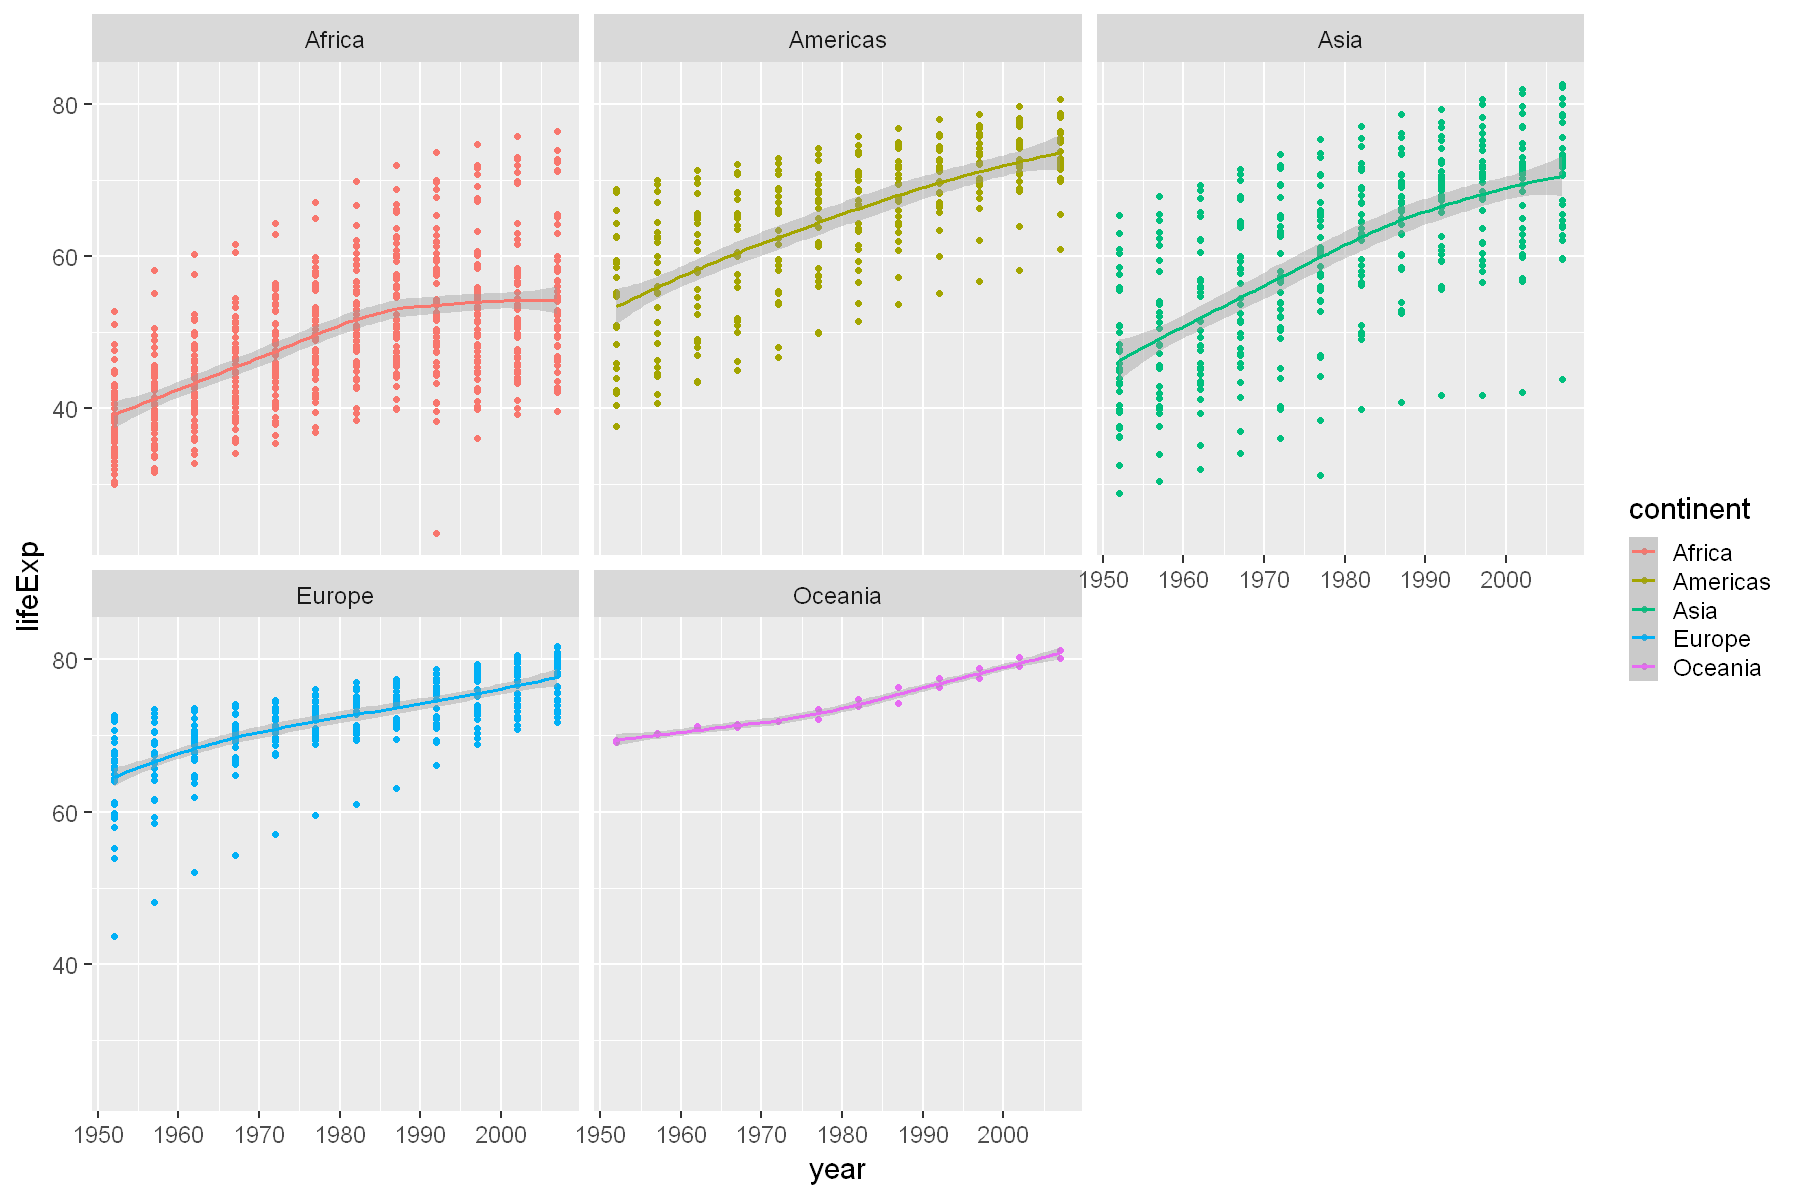

In [19]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(gapminder, aes(x = year, y = lifeExp, color = continent)) +
  geom_point() +
  geom_smooth() +
  facet_wrap(facets = ~ continent, ncol = 3)

In [26]:
gapminder2007 |> select(lifeExp, continent) |> skim()

── Data Summary ────────────────────────
                           Values                      
Name                       select(gapminder2007, lif...
Number of rows             142                         
Number of columns          2                           
_______________________                                
Column type frequency:                                 
  factor                   1                           
  numeric                  1                           
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 continent             0             1 FALSE          5
  top_counts                        
1 Afr: 52, Asi: 33, Eur: 30, Ame: 25

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean   

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


 the global median life expectancy in 2007 was 71.94. Thus, half of the world’s countries (71 countries) had a life expectancy less than 71.94. The mean life expectancy of 67.01 is lower, however. Why is the mean life expectancy lower than the median?

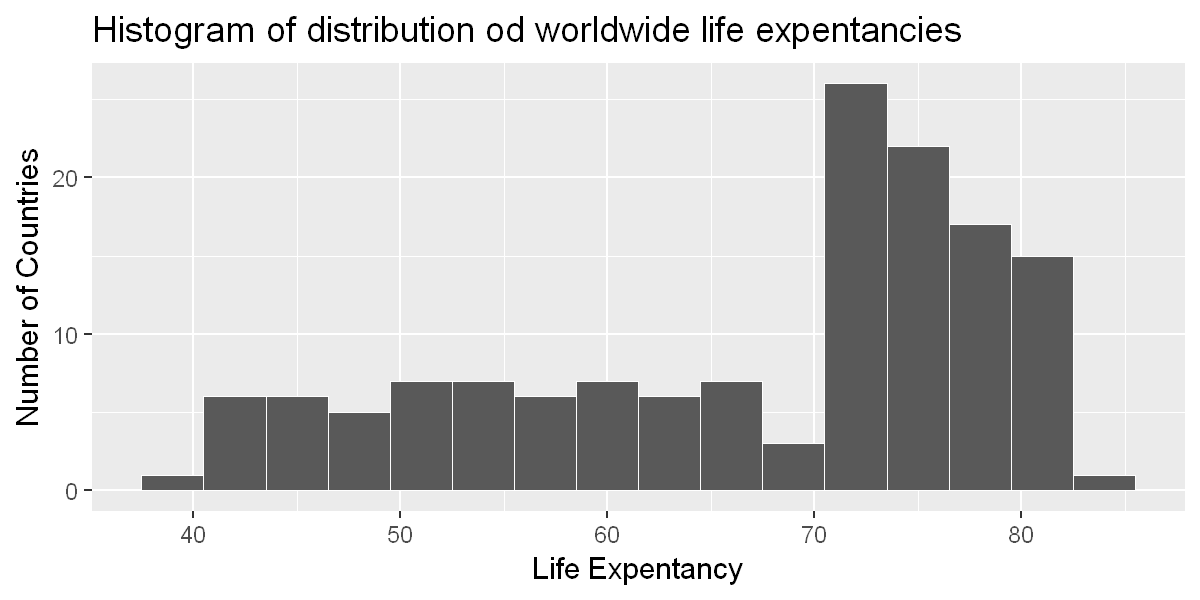

In [29]:
options(repr.plot.width = 10, repr.plot.height = 5)

ggplot(gapminder2007, aes(lifeExp)) +
  geom_histogram(binwidth = 3, color = "white") + 
  labs(x = "Life Expentancy", y = "Number of Countries",
       title = "Histogram of distribution od worldwide life expentancies")

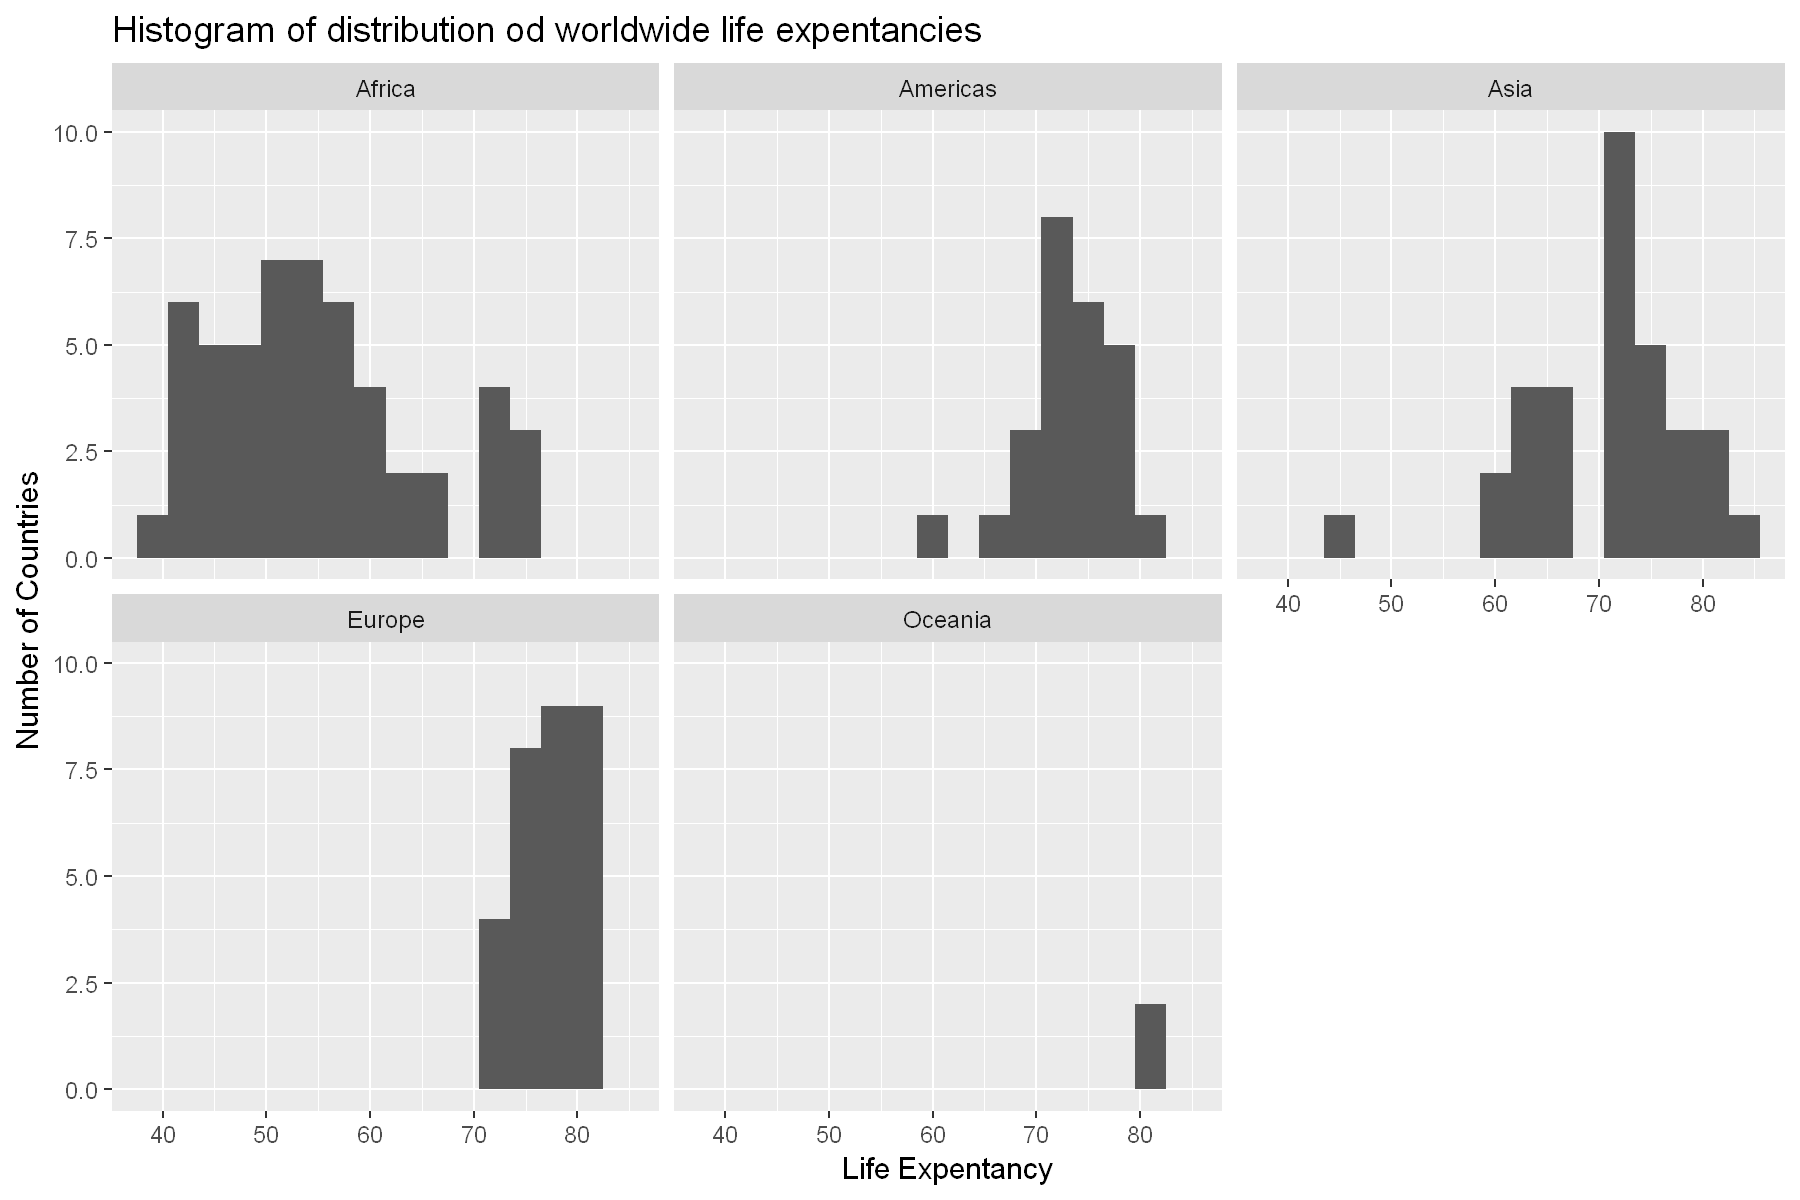

In [32]:
options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(gapminder2007, aes(x = lifeExp)) +
  geom_histogram(binwidth = 3) +
  labs(x = "Life Expentancy", y = "Number of Countries",
       title = "Histogram of distribution od worldwide life expentancies") +
  facet_wrap(~ continent, nrow = 2)

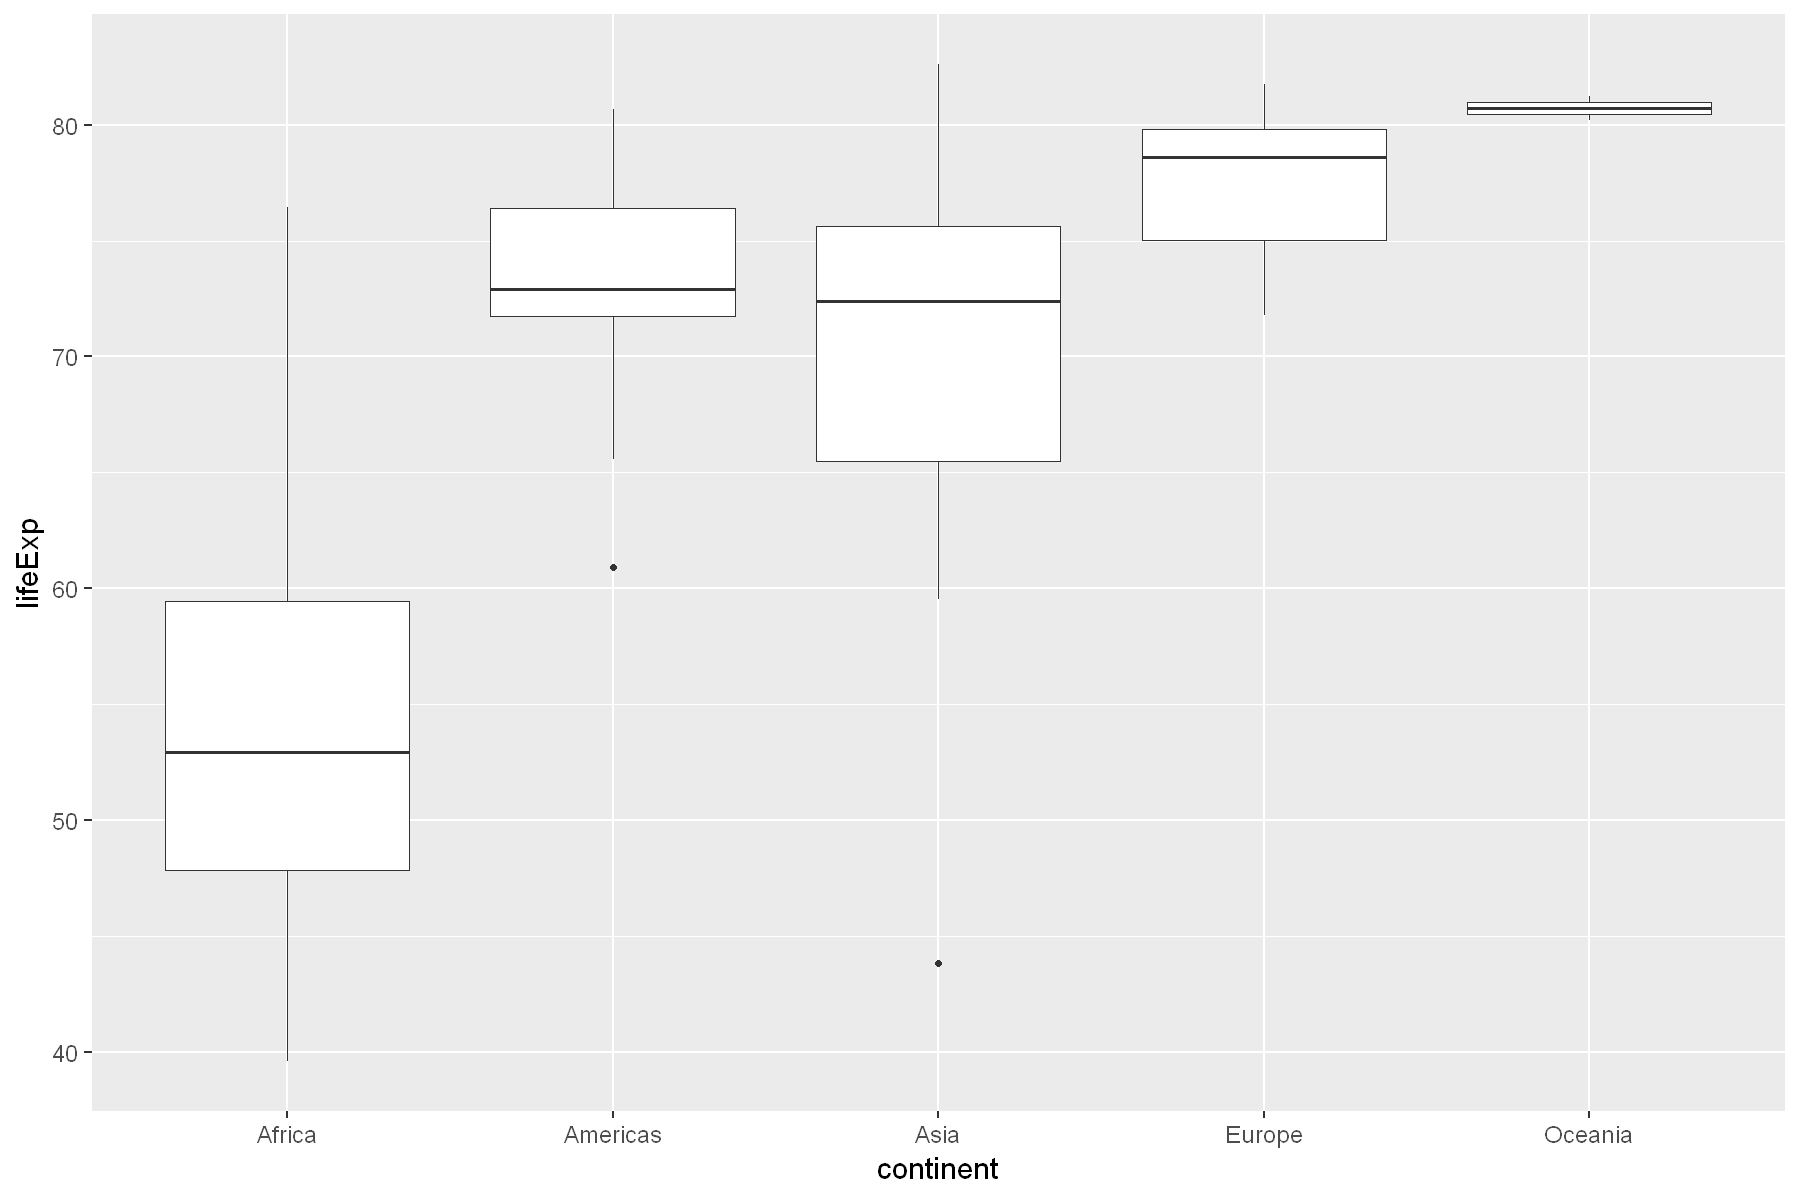

In [34]:
ggplot(gapminder2007, aes(x  = continent, y = lifeExp)) +
  geom_boxplot()

In [37]:
lifeExpByContinent <- gapminder2007 |> group_by(continent) |>
  summarize(meanLifeExp = mean(lifeExp),
            medLifeExp = median(lifeExp))

lifeExpByContinent

continent,meanLifeExp,medLifeExp
<fct>,<dbl>,<dbl>
Africa,54.80604,52.9265
Americas,73.60812,72.8990
Asia,70.72848,72.3960
Europe,77.64860,78.6085
Oceania,80.71950,80.7195


# Linear Regression

In [38]:
lifeExpModel <- lm(lifeExp ~ continent, data = gapminder2007)

get_regression_table(lifeExpModel)

term,estimate,std_error,statistic,p_value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,54.806,1.025,53.446,0,52.778,56.834
continent: Americas,18.802,1.800,10.448,0,15.243,22.361
continent: Asia,15.922,1.646,9.675,0,12.668,19.177
continent: Europe,22.843,1.695,13.474,0,19.490,26.195
continent: Oceania,25.913,5.328,4.863,0,15.377,36.450


In [39]:
modLifeExp <- linear_reg() |> set_engine("lm")
modFitLifeExp <- mod |> fit(lifeExp ~ continent, data = gapminder2007)
tidy(modFitLifeExp)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),54.80604,1.025447,53.446016,1.230613e-93
continentAmericas,18.80208,1.799652,10.447623,3.744223e-19
continentAsia,15.92245,1.645756,9.674850,3.413979e-17
continentEurope,22.84256,1.695350,13.473655,7.099697e-27
continentOceania,25.91346,5.328377,4.863293,3.122425e-06
